In [55]:
import pandas as pd

import seaborn as sns
plt.rcParams['figure.figsize'] =(45,15)
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../src/')
from titanic import *
from titanic_mp import *

# Load in Training and Test DataSets
# Check for Missing Values in Columns Provided

In [2]:
# importing data sets from kernel 

df = pd.read_csv('../data/raw/train.csv')
df['Total'] = 0

rows = len(df)
columns = len(df.columns)
values = rows*columns
non_na = df.count().sum()
na = values-non_na
print('In Training Set:\n')
print('Number of rows:', rows)
print('Number of columns:', columns, '\n')


identify_blanks(df)




# test = pd.read_csv('../data/raw/test.csv')

# rows_test = len(test)
# columns_test = len(test.columns)
# values = rows_test*columns_test
# non_na_test = test.count().sum()
# na_test = values_test-non_na_test

# print('Number of rows:', rows_test, '\n')
# print('Number of columns:', columns_test, '\n')


# print('     In Test Set:')
# identify_blanks(test)

In Training Set:

Number of rows: 891
Number of columns: 13 

Column PassengerId has 0 missing values out of 891.  0%
Column Survived has 0 missing values out of 891.  0%
Column Pclass has 0 missing values out of 891.  0%
Column Name has 0 missing values out of 891.  0%
Column Sex has 0 missing values out of 891.  0%
Column Age has 177 missing values out of 891.  19%
Column SibSp has 0 missing values out of 891.  0%
Column Parch has 0 missing values out of 891.  0%
Column Ticket has 0 missing values out of 891.  0%
Column Fare has 0 missing values out of 891.  0%
Column Cabin has 687 missing values out of 891.  77%
Column Embarked has 2 missing values out of 891.  0%
Column Total has 0 missing values out of 891.  0%


In [3]:
print('Below is a list of columns that have missing values:')
#Highlight what columns have missing values
[col for col in df.columns if df[col].isnull().any()]

Below is a list of columns that have missing values:


['Age', 'Cabin', 'Embarked']

# Begin to Clean Data to Assess how to handle Missing Columns above

## Delimit out the 'Name' column to become more relevant
### Before (below)

In [4]:
df['Name'][0]

'Braund, Mr. Owen Harris'

### After (below)

Prefix = Mr

First_Name = Owen

Last_Name = Braund

In [5]:
df_name1 = df.Name.str.split(',', expand=True).add_prefix('Name_')
df1 = df.join(df_name1)
df1.rename(columns={'Name_0':'Last_Name', 'Name':'Full_Name', 'Name_1':'Name'}, inplace=True)

In [6]:
df_name2 = df1.Name.str.split('.', expand=True).add_prefix('Name_')
df2 = df1.join(df_name2)
df2.rename(columns={'Name_0':'Prefix', 'Name_1':'Name_Fix'}, inplace=True)
df2.drop(columns=['Name_2'], inplace=True)

In [7]:
df_name3 = df2.Name_Fix.str.split(' ', expand=True).add_prefix('Name_')
df3 = df2.join(df_name3)
df3.rename(columns={'Name_1':'First_Name'}, inplace=True)
df3.drop(columns=['Name_0',
                 'Name_2',
                 'Name_3',
                 'Name_4',
                 'Name_5',
                 'Name_6',
                 'Name_7',
                 'Name_8',
                 'Name_9',
                 'Name_10',
                 'Name_Fix',
                 'Name'], inplace=True)

In [8]:
df3 = df3[['PassengerId', 'Survived', 'Pclass', 'Full_Name', 
           'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 
           'Embarked', 'Prefix', 'First_Name', 'Last_Name', 'Total']]

df3['Prefix'] = df3['Prefix'].str.strip()

## Below will confirm the named prefixes to have a direct correlation to the Sex of the individual:

In [9]:
freq_dist(df3, 'Prefix')

              Prefix  pct_total
Mr               517   0.580247
Miss             182   0.204265
Mrs              125   0.140292
Master            40   0.044893
Dr                 7   0.007856
Rev                6   0.006734
Mlle               2   0.002245
Col                2   0.002245
Major              2   0.002245
Sir                1   0.001122
Mme                1   0.001122
Jonkheer           1   0.001122
Lady               1   0.001122
the Countess       1   0.001122
Don                1   0.001122


In [10]:
print('Mr: ',df3.loc[df3['Prefix']=='Mr'].Sex.value_counts(dropna=False), '\n')
print('Miss: ',df3.loc[df3['Prefix']=='Miss'].Sex.value_counts(dropna=False), '\n')
print('Mrs: ',df3.loc[df3['Prefix']=='Mrs'].Sex.value_counts(dropna=False), '\n')
print('Master: ',df3.loc[df3['Prefix']=='Master'].Sex.value_counts(dropna=False), '\n')
print('Dr: ',df3.loc[df3['Prefix']=='Dr'].Sex.value_counts(dropna=False), '\n')
print('Rev: ',df3.loc[df3['Prefix']=='Rev'].Sex.value_counts(dropna=False), '\n')
print('Mlle: ',df3.loc[df3['Prefix']=='Mlle'].Sex.value_counts(dropna=False), '\n')
print('Col: ',df3.loc[df3['Prefix']=='Col'].Sex.value_counts(dropna=False), '\n')
print('Major: ',df3.loc[df3['Prefix']=='Major'].Sex.value_counts(dropna=False), '\n')
print('Mme: ',df3.loc[df3['Prefix']=='Mme'].Sex.value_counts(dropna=False), '\n')
print('Lady: ',df3.loc[df3['Prefix']=='Lady'].Sex.value_counts(dropna=False), '\n')
print('Don: ',df3.loc[df3['Prefix']=='Don'].Sex.value_counts(dropna=False), '\n')
print('Ms: ',df3.loc[df3['Prefix']=='Ms'].Sex.value_counts(dropna=False), '\n')
print('the Countess: ',df3.loc[df3['Prefix']=='the Countess'].Sex.value_counts(dropna=False), '\n')
print('Capt: ',df3.loc[df3['Prefix']=='Capt'].Sex.value_counts(dropna=False), '\n')

Mr:  male    517
Name: Sex, dtype: int64 

Miss:  female    182
Name: Sex, dtype: int64 

Mrs:  female    125
Name: Sex, dtype: int64 

Master:  male    40
Name: Sex, dtype: int64 

Dr:  male      6
female    1
Name: Sex, dtype: int64 

Rev:  male    6
Name: Sex, dtype: int64 

Mlle:  female    2
Name: Sex, dtype: int64 

Col:  male    2
Name: Sex, dtype: int64 

Major:  male    2
Name: Sex, dtype: int64 

Mme:  female    1
Name: Sex, dtype: int64 

Lady:  female    1
Name: Sex, dtype: int64 

Don:  male    1
Name: Sex, dtype: int64 

Ms:  female    1
Name: Sex, dtype: int64 

the Countess:  female    1
Name: Sex, dtype: int64 

Capt:  male    1
Name: Sex, dtype: int64 



## Split the samples with ages missing and included and conduct a comparison of survival rates based on named prefixes

In [11]:
df_age_missing = df3.loc[df['Age'].isnull()]

In [12]:
df_age_incl = df3.loc[df['Age'].notnull()]

In [13]:
print('Summary for passengers with missing ages below:')
df_age_missing.describe(include='all')

Summary for passengers with missing ages below:


,PassengerId,Survived,Pclass,Full_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,First_Name,Last_Name,Total
count,177.000000,177.000000,177.000000,177,177,0.0,177.000000,177.000000,177,177.000000,19,177,177,177,177,177.0
unique,NaN,NaN,NaN,177,2,NaN,NaN,NaN,155,NaN,19,3,5,123,150,NaN
top,NaN,NaN,NaN,"O'Leary, Miss. Hanora ""Norah""",male,NaN,NaN,NaN,CA. 2343,NaN,C52,S,Mr,Thomas,Sage,NaN
freq,NaN,NaN,NaN,1,124,NaN,NaN,NaN,7,NaN,1,90,119,9,7,NaN
mean,435.581921,0.293785,2.598870,NaN,NaN,NaN,0.564972,0.180791,NaN,22.158567,NaN,NaN,NaN,NaN,NaN,0.0
std,250.552901,0.456787,0.763216,NaN,NaN,NaN,1.626316,0.534145,NaN,31.874608,NaN,NaN,NaN,NaN,NaN,0.0
min,6.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,230.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.750000,NaN,NaN,NaN,NaN,NaN,0.0
50%,452.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN,NaN,0.0
75%,634.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,24.150000,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
print('Summary for passengers with ages include below:')
df_age_incl.describe(include='all')




Summary for passengers with ages include below:


,PassengerId,Survived,Pclass,Full_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,First_Name,Last_Name,Total
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712,714,714,714,714.0
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3,17,367,535,NaN
top,NaN,NaN,NaN,"McGough, Mr. James Robert",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S,Mr,William,Andersson,NaN
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554,398,43,9,NaN
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN,NaN,NaN,NaN,0.0
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN,NaN,NaN,NaN,0.0
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN,NaN,NaN,NaN,0.0
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN,NaN,NaN,NaN,0.0
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
print('Distribution of Prefixes for Missing Ages:')
freq_dist(df_age_missing, 'Prefix')


Distribution of Prefixes for Missing Ages:
        Prefix  pct_total
Mr         119   0.672316
Miss        36   0.203390
Mrs         17   0.096045
Master       4   0.022599
Dr           1   0.005650


In [16]:
print('Distribution of Prefixes for Included Ages:')
freq_dist(df_age_incl, 'Prefix')

Distribution of Prefixes for Included Ages:
              Prefix  pct_total
Mr               398   0.557423
Miss             146   0.204482
Mrs              108   0.151261
Master            36   0.050420
Rev                6   0.008403
Dr                 6   0.008403
Mlle               2   0.002801
Col                2   0.002801
Major              2   0.002801
Sir                1   0.001401
Mme                1   0.001401
Jonkheer           1   0.001401
Lady               1   0.001401
the Countess       1   0.001401
Don                1   0.001401


### Comparing Male vs. Female Survival Counts: DF with ages missing & DF with ages included

Left side: Ages Missing:

Total          0             
Sex       female     male    
Survived       0   1    0   1
Survived      17  36  108  16
pct_total      9  20   61   9


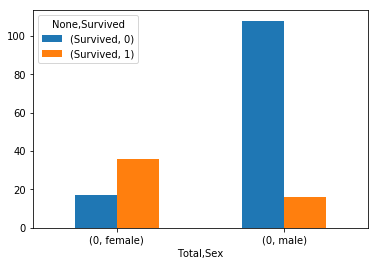

In [17]:
print('Left side: Ages Missing:\n')
review_detail(df_age_missing,
              'Total', "", 
              'Sex', '', 
              False,'count','not', False)

Right side: Ages Included:

Total          0              
Sex       female      male    
Survived       0    1    0   1
Survived      64  197  360  93
pct_total      8   27   50  13


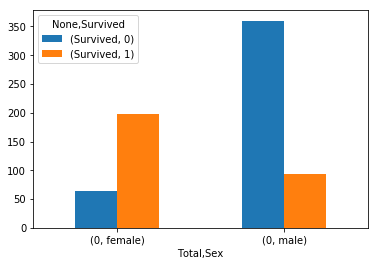

In [18]:
print('Right side: Ages Included:\n')
review_detail(df_age_incl,
              'Total', "", 
              'Sex', '', 
              False,'count','not', False)

### Comparing Survival Counts for each of the prefixes: 
    - DF with ages missing (left)
    - DF with ages included (right)

Total          0    
Sex       female    
Survived       0   1
Survived      17  36
pct_total     32  67


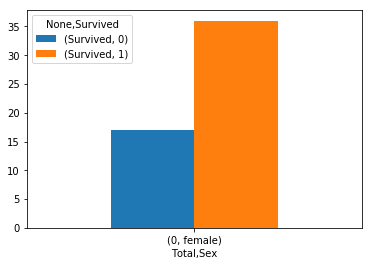

In [23]:
review_detail(df_age_missing,
              'Total', "", 
              'Sex', 'female', 
              False,'count','all', False)

Total        0    
Sex       male    
Survived     0   1
Survived   360  93
pct_total   79  20


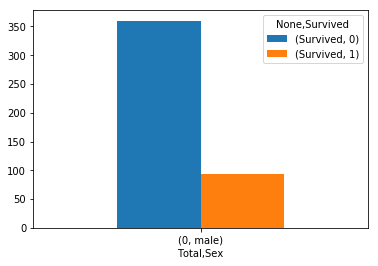

In [24]:
review_detail(df_age_incl,
              'Total', "", 
              'Sex', 'male', 
              False,'count','all', False)

Below is the total 
Total          0    
Sex       female    
Survived       0   1
Survived      17  36
pct_total     32  67


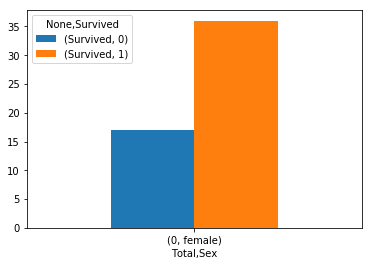

In [25]:
review_detail(df_age_missing,
              'Total', "", 
              'Sex', 'female', 
              False,'count','all', False)

Total        0    
Sex       male    
Survived     0   1
Survived   360  93
pct_total   79  20


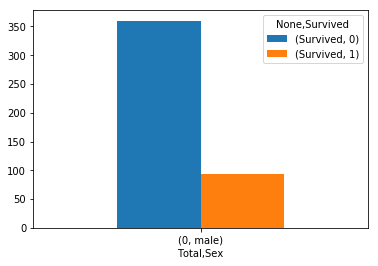

In [26]:
review_detail(df_age_incl,
              'Total', "", 
              'Sex', 'male', 
              False,'count','all', False)


### Based on the above output, there is a consistency between two data sets comparing survival rates of 'Prefixes'  

## Reviewig 'SibSp' columns relevance

In [29]:
freq_dist(df_age_missing, 'SibSp')

   SibSp  pct_total
0    137   0.774011
1     26   0.146893
8      7   0.039548
3      4   0.022599
2      3   0.016949


In [30]:
freq_dist(df_age_incl, 'SibSp')

   SibSp  pct_total
0    471   0.659664
1    183   0.256303
2     25   0.035014
4     18   0.025210
3     12   0.016807
5      5   0.007003


SibSp        0       1      2     3  8
Total        0       0      0     0  0
Survived     0   1   0   1  0  1  0  0
Survived   102  35  11  15  1  2  4  7
pct_total   57  19   6   8  0  1  2  3


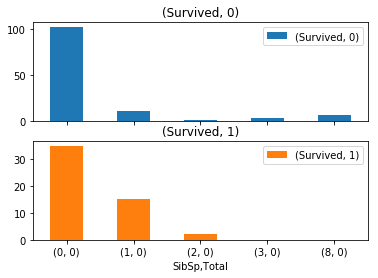

In [31]:
review_detail(df_age_missing,
              'SibSp', "", 
              'Total', '', 
              True,'count','not all', False)

### (Above) Dropping age is still a viable option, as there is no real diff between

## Look at the distribution of ages for population of: survivors and the deceased

Sex       female      male    
Total          0         0    
Survived       0    1    0   1
Survived      64  197  360  93
pct_total      8   27   50  13


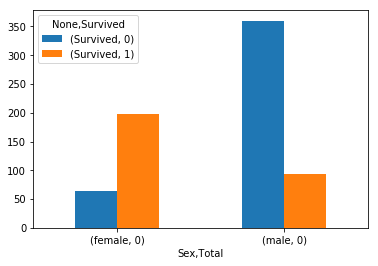

In [32]:
review_detail(df_age_incl,
              'Sex', "", 
              'Total', '', 
              False,'count','not', False)

### (Above) There is a clear inverse relationship between survivors sex....

In [33]:
df_dec = df_age_incl.loc[df_age_incl['Survived'] == 1]

In [34]:
df_surv = df_age_incl.loc[df_age_incl['Survived'] == 0]

In [35]:
df4 = df_age_incl

## Review Pclass Relevance

Pclass      1        2        3    
Total       0        0        0    
Survived    0    1   0   1    0   1
Survived   64  122  90  83  270  85
pct_total   8   17  12  11   37  11


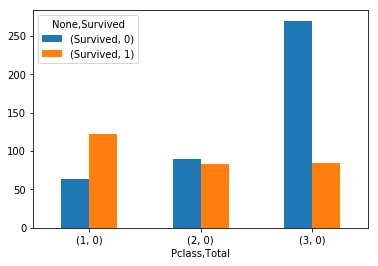

In [36]:
review_detail(df4,
              'Pclass', "", 
              'Total', '', 
              False,'count','not', False)

## Review Pclass Relevance in Relation to Age
### Results - Create the following groups:
    - 0 = Males 17 and Under
    - 1 = Males Over 17
    - 2 = Females 39 and Under
    - 3 = Females Over 39
    
   **Below is the supporting evidence in bar charts used for the justification of this age group

In [37]:
df_f_yng = df4.loc[df4['Age']<39]
df_f_old = df4.loc[df4['Age']>=39]
df_m_yng = df4.loc[df4['Age']<17]
df_m_old = df4.loc[df4['Age']>=17] 

Pclass       1    2        3    
Sex       male male     male    
Survived     1    0   1    0   1
Survived     3    2   9   27  10
pct_total    5    3  17   52  19


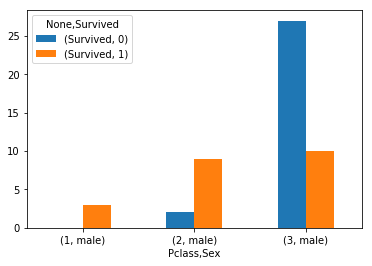

In [38]:
review_detail(df_m_yng,
              'Pclass', "", 
              'Sex', 'male', 
              False,'count','all', False)

Pclass         1          2          3    
Sex       female     female     female    
Survived       0   1      0   1      0   1
Survived       2  51      4  54     44  46
pct_total      0  25      1  26     21  22


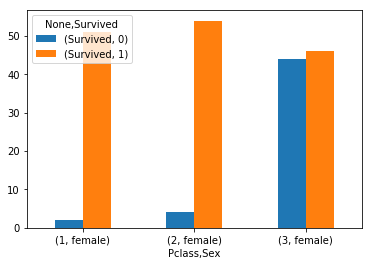

In [39]:
review_detail(df_f_yng,
              'Pclass', "", 
              'Sex', 'female', 
              False,'count','all', False)


Pclass       1        2       3    
Sex       male     male    male    
Survived     0   1    0  1    0   1
Survived    61  37   82  6  188  28
pct_total   15   9   20  1   46   6


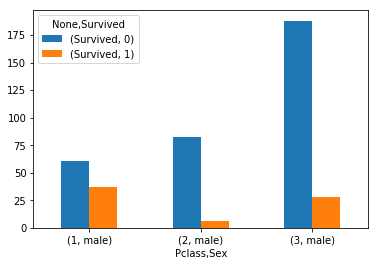

In [40]:
review_detail(df_m_old,
              'Pclass', "", 
              'Sex', 'male', 
              False,'count','all', False)

Pclass         1          2          3   
Sex       female     female     female   
Survived       0   1      0   1      0  1
Survived       1  31      2  14     11  1
pct_total      1  51      3  23     18  1


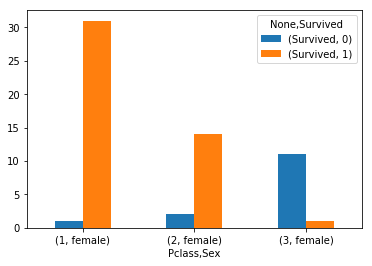

In [41]:
review_detail(df_f_old,
              'Pclass', "", 
              'Sex', 'female', 
              False,'count','all', False)

### (Above) There is even more significance between male and female when considering the PClass

In [42]:
df4.loc[(df4['Age']<17) & (df4['Sex'] == 'male') , 'Age_Bins'] = 0
df4.loc[(df4['Age']>17) & (df4['Sex'] == 'male'), 'Age_Bins'] = 1
df4.loc[(df4['Age']<39) & (df4['Sex'] == 'female'), 'Age_Bins'] = 2
df4.loc[(df4['Age']>39) & (df4['Sex'] == 'female'), 'Age_Bins'] = 3

In [43]:
freq_dist(df4, 'Age_Bins')

     Age_Bins  pct_total
1.0       395   0.563481
2.0       201   0.286733
3.0        54   0.077033
0.0        51   0.072753


In [44]:
df_numeric = df4

In [45]:
freq_dist(df_numeric, 'Sex')

        Sex  pct_total
male    453   0.634454
female  261   0.365546


In [46]:
df_numeric.Sex.replace(['male', 'female'] , 
                  [0, 1],
                 inplace=True)
freq_dist(df_numeric, 'Sex')

   Sex  pct_total
0  453   0.634454
1  261   0.365546


In [54]:
df_m_yng.Prefix.value_counts(dropna=False)

Miss      47
Master    36
Mr        15
Mrs        2
Name: Prefix, dtype: int64

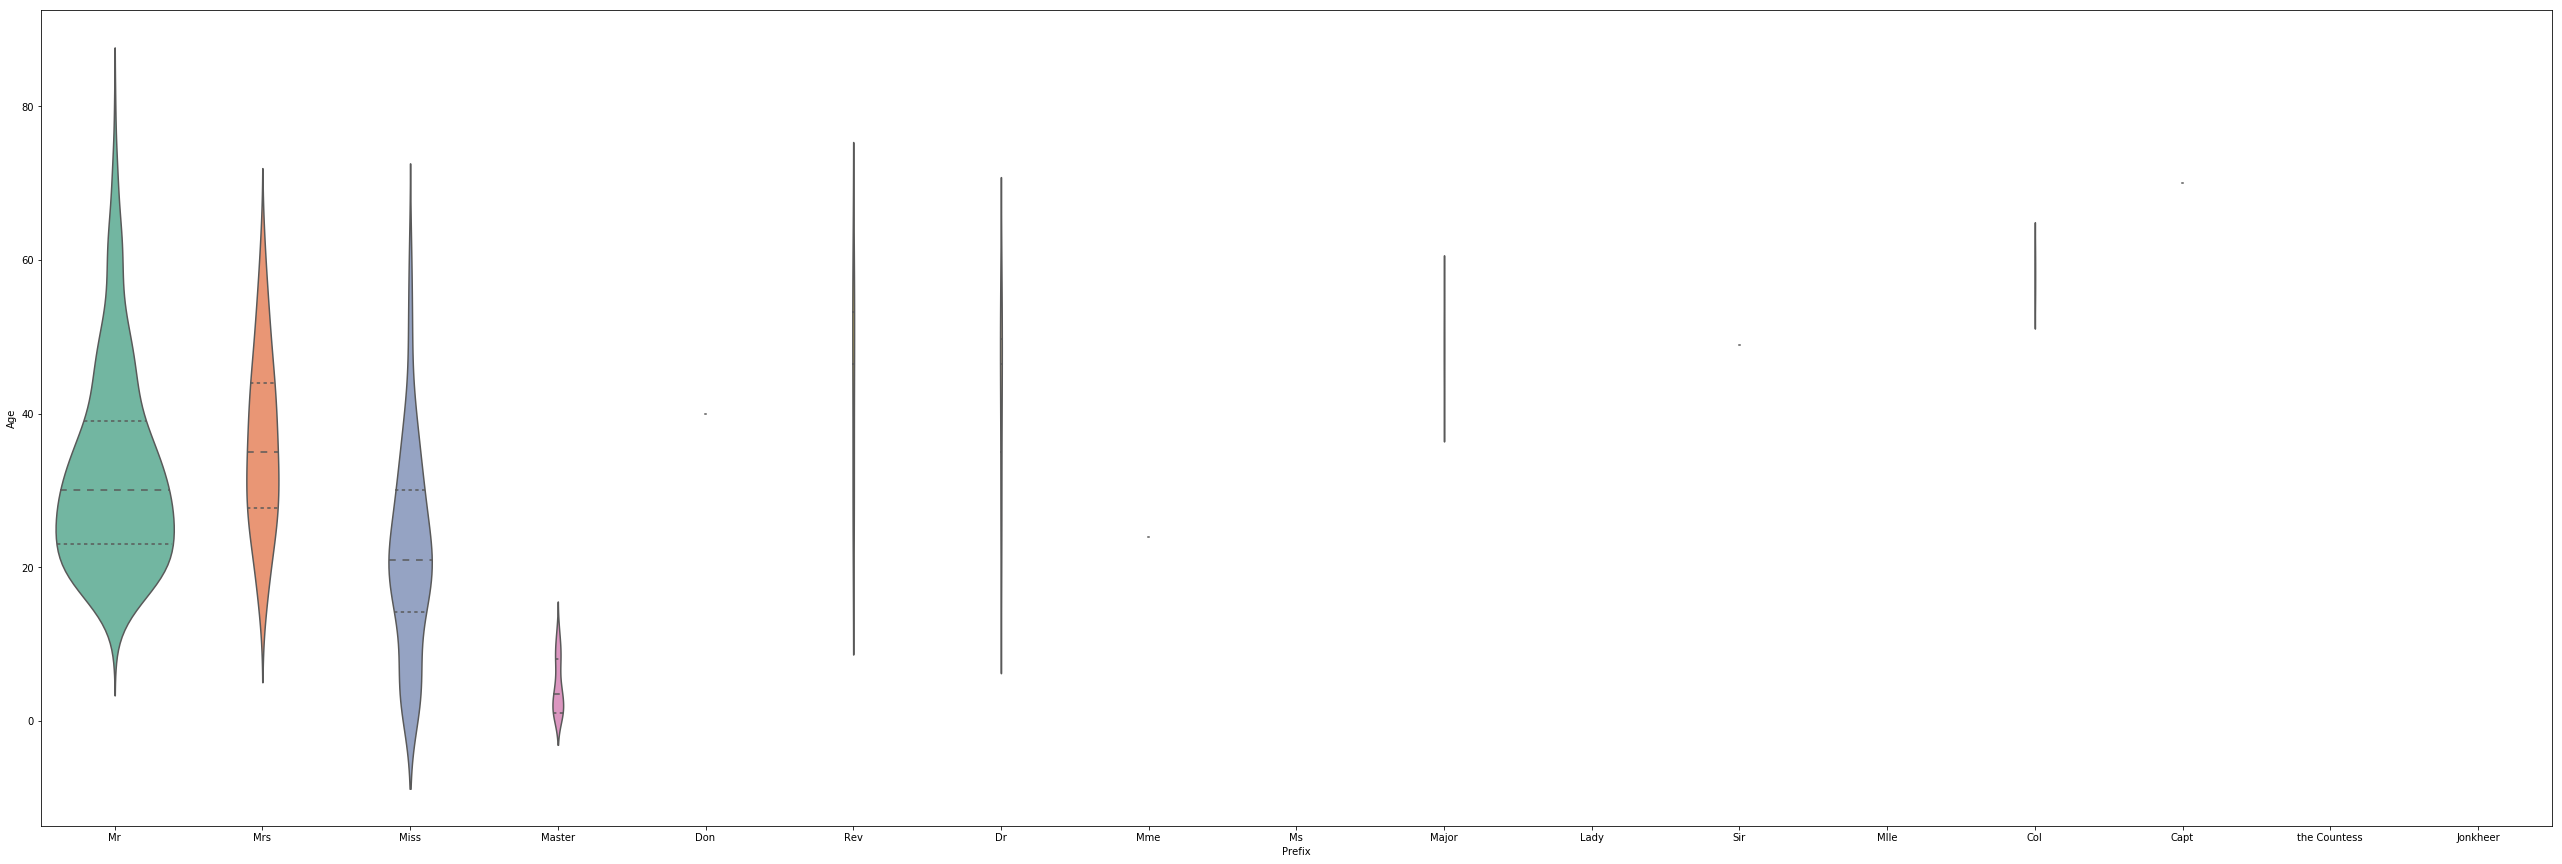

In [57]:
sns.violinplot(x="Prefix", y="Age", 
               data=df4, palette="Set2", 
               scale="count", inner="quartile")

In [ ]:
#Selecting only text columns to confirm above; There should be none other than 'CustomerID' before moving forward
text = ['object', 'category']
text_cols = df_a.select_dtypes(include= text)
print(text_cols.columns, '\n')
print(text_cols.shape)
text_cols.head(2).T